# GM vs Tesla

follow this blog:

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

In [1]:
# quandl for financial data
import quandl
# pandas for data manipulation
import pandas as pd
import matplotlib.pyplot as plt

# Retrieve TSLA data from Quandl
#tesla = quandl.get('WIKI/TSLA')
# Retrieve the GM data from Quandl
#gm = quandl.get('WIKI/GM')
#gm.head(5)

In [2]:
quandl.ApiConfig.api_key = '_qXuCfszpQ8sVLHJex5R'

In [3]:
# Retrieve TSLA data from Quandl
tesla = quandl.get('WIKI/TSLA')
# Retrieve the GM data from Quandl
gm = quandl.get('WIKI/GM')
gm.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


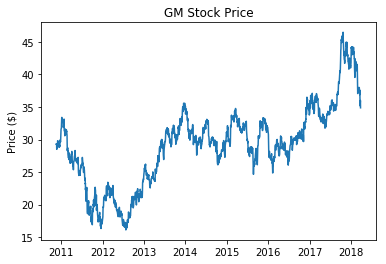

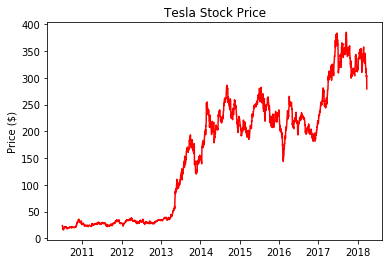

In [4]:
# make first plot

plt.plot(gm.index, gm['Adj. Close'])
plt.title('GM Stock Price')
plt.ylabel('Price ($)')
plt.show()


plt.plot(tesla.index, tesla['Adj. Close'],'r')
plt.title('Tesla Stock Price')
plt.ylabel('Price ($)')
plt.show()

In [5]:
# Yearly average number of shares outstanding for Tesla and GM
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 
                2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}
gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 
             2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}


tesla['Year'] = tesla.index.year

tesla.reset_index(level=0, inplace=True)
tesla['cap'] = 0

# Calculate market cap for all years
for i, year in enumerate(tesla['Year']):
    # Retrieve the shares for the year
    shares = tesla_shares.get(year)
    
    # Update the cap column to shares times the price
    tesla.ix[i, 'cap'] = shares * tesla.ix[i, 'Adj. Close']
    

gm['Year'] = gm.index.year
gm.reset_index(level=0, inplace=True)
gm['cap'] = 0

# Calculate market cap for all years
for i, year in enumerate(gm['Year']):
    # Retrieve the shares for the year
    shares = gm_shares.get(year)
    
    # Update the cap column to shares times the price
    gm.ix[i, 'cap'] = shares * gm.ix[i, 'Adj. Close']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [6]:
cars = gm.merge(tesla, how = 'inner', on='Date')
cars.rename(columns ={'cap_x':'gm_cap', 'cap_y': 'tesla_cap'}, inplace=True)
cars = cars[['Date','gm_cap','tesla_cap']]

cars['gm_cap'] = cars['gm_cap']/1e9
cars['tesla_cap'] = cars['tesla_cap']/1e9

cars.head()

,Date,gm_cap,tesla_cap
0,2010-11-18,43.941453,1.52439
1,2010-11-19,44.031417,1.58049
2,2010-11-22,43.800079,1.70340
3,2010-11-23,42.733352,1.76307
4,2010-11-24,43.028951,1.80897


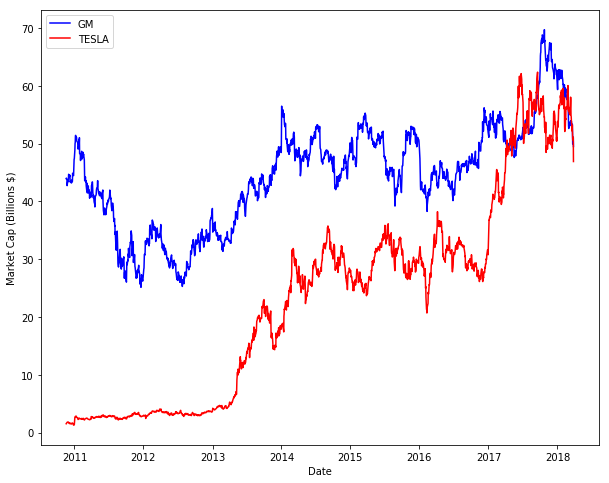

In [7]:
# make second plot

plt.figure(figsize=(10,8))

plt.plot(cars.Date, cars.gm_cap, 'b-', label='GM')
plt.plot(cars.Date, cars.tesla_cap, 'r-', label='TESLA')
plt.xlabel('Date')
plt.ylabel('Market Cap (Billions $)')
plt.legend()

In [8]:
import numpy as np

# Find the first and last time Tesla was valued higher than GM

list1 = list(np.where(cars.tesla_cap > cars.gm_cap)[0])
first_date = cars['Date'].iloc[np.min(list1)]
last_date  = cars['Date'].iloc[np.max(list1)]

print("Tesla was valued higher than GM from {} to {}.".format(first_date.date(), last_date.date()))

Tesla was valued higher than GM from 2017-04-10 to 2018-03-23.


## Prediction using Facebook Prophet

In [9]:
import fbprophet

gm = gm.rename(columns = {'Date':'ds', 'cap':'y'})
gm.y = gm.y/1.e9

gm_prophet = fbprophet.Prophet(changepoint_prior_scale = 0.15)
gm_prophet.fit(gm)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
# Repeat for the tesla data
tesla =tesla.rename(columns={'Date': 'ds', 'cap': 'y'})
tesla['y'] = tesla['y'] / 1e9
tesla_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05, n_changepoints=10)
tesla_prophet.fit(tesla)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
# Make prediction for 2 years

gm_forecast = gm_prophet.make_future_dataframe(periods = 365*2, freq = 'D')
gm_forecast = gm_prophet.predict(gm_forecast)

Text(0.5, 1.0, 'Market Cap of GM')

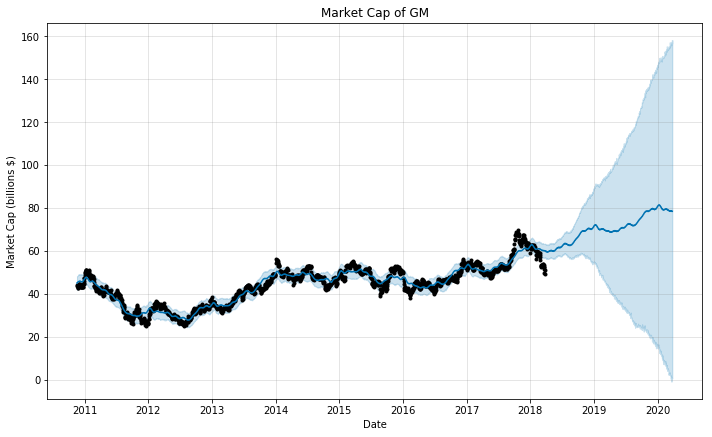

In [12]:
gm_prophet.plot(gm_forecast, xlabel='Date', ylabel='Market Cap (billions $)')
plt.title('Market Cap of GM')

In [13]:
tesla_forecast = tesla_prophet.make_future_dataframe(periods = 365*2, freq = 'D')
tesla_forecast = tesla_prophet.predict(gm_forecast)

Text(0.5, 1.0, 'Market Cap of Telsa')

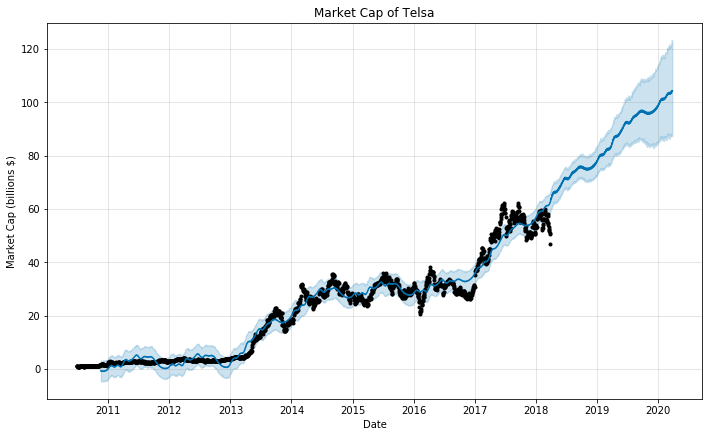

In [14]:
tesla_prophet.plot(tesla_forecast, xlabel='Date', ylabel='Market Cap (billions $)')
plt.title('Market Cap of Telsa')

In [15]:
gm_prophet.changepoints[:10]

59    2011-02-14
118   2011-05-10
177   2011-08-03
236   2011-10-26
296   2012-01-24
355   2012-04-18
414   2012-07-12
473   2012-10-04
532   2013-01-02
591   2013-03-28
Name: ds, dtype: datetime64[ns]

In [16]:
tesla_prophet.changepoints[:10]

156    2011-02-09
312    2011-09-22
467    2012-05-04
623    2012-12-18
779    2013-08-02
935    2014-03-18
1091   2014-10-28
1246   2015-06-11
1402   2016-01-25
1558   2016-09-06
Name: ds, dtype: datetime64[ns]

### Effect of changepoint prior scale

In [17]:
# Try 4 different changepoints
for changepoint in [0.001, 0.05, 0.1, 0.5]:
    model = fbprophet.Prophet(daily_seasonality=False, changepoint_prior_scale=changepoint)
    model.fit(tesla)
    
    future = model.make_future_dataframe(periods=365, freq='D')
    future = model.predict(future)
    
    tesla[changepoint] = future['yhat']

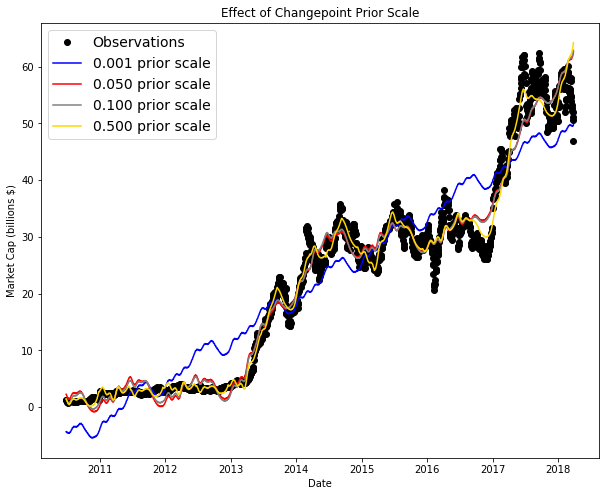

In [18]:
# Create the plot
plt.figure(figsize=(10, 8))

# Actual observations
plt.plot(tesla['ds'], tesla['y'], 'ko', label = 'Observations')
colors = {0.001: 'b', 0.05: 'r', 0.1: 'grey', 0.5: 'gold'}

# Plot each of the changepoint predictions
for changepoint in [0.001, 0.05, 0.1, 0.5]:
    plt.plot(tesla['ds'], tesla[changepoint], color = colors[changepoint], label = '%.3f prior scale' % changepoint)
    
plt.legend(prop={'size': 14})
plt.xlabel('Date'); plt.ylabel('Market Cap (billions $)'); plt.title('Effect of Changepoint Prior Scale');

## Compare two trends

In [19]:
gm_names = ['gm_%s' % column for column in gm_forecast.columns]
tesla_names = ['tesla_%s' % column for column in tesla_forecast.columns]

In [20]:
# Dataframes to merge
merge_gm_forecast = gm_forecast.copy()
merge_tesla_forecast = tesla_forecast.copy()

# Rename the columns
merge_gm_forecast.columns = gm_names
merge_tesla_forecast.columns = tesla_names

In [21]:
# Merge the two datasets
forecast = pd.merge(merge_gm_forecast, merge_tesla_forecast, how = 'inner', left_on = 'gm_ds', right_on = 'tesla_ds')

# Rename date column
forecast = forecast.rename(columns={'gm_ds': 'Date'}).drop('tesla_ds', axis=1)
forecast.head()

,Date,gm_trend,gm_yhat_lower,gm_yhat_upper,gm_trend_lower,gm_trend_upper,gm_additive_terms,gm_additive_terms_lower,gm_additive_terms_upper,gm_weekly,...,tesla_weekly,tesla_weekly_lower,tesla_weekly_upper,tesla_yearly,tesla_yearly_lower,tesla_yearly_upper,tesla_multiplicative_terms,tesla_multiplicative_terms_lower,tesla_multiplicative_terms_upper,tesla_yhat
0,2010-11-18,42.615585,41.938577,48.369302,42.615585,42.615585,2.531744,2.531744,2.531744,0.066815,...,-0.192466,-0.192466,-0.192466,-2.284715,-2.284715,-2.284715,0.0,0.0,0.0,-0.693293
1,2010-11-19,42.645313,41.939872,48.260689,42.645313,42.645313,2.528945,2.528945,2.528945,0.012014,...,-0.221076,-0.221076,-0.221076,-2.318645,-2.318645,-2.318645,0.0,0.0,0.0,-0.745844
2,2010-11-22,42.734498,42.163403,48.559762,42.734498,42.734498,2.731987,2.731987,2.731987,0.046545,...,-0.137378,-0.137378,-0.137378,-2.409908,-2.409908,-2.409908,0.0,0.0,0.0,-0.723438
3,2010-11-23,42.764227,42.322010,48.677156,42.764227,42.764227,2.729761,2.729761,2.729761,-0.010921,...,-0.171823,-0.171823,-0.171823,-2.436556,-2.436556,-2.436556,0.0,0.0,0.0,-0.774541
4,2010-11-24,42.793955,42.494538,49.055000,42.793955,42.793955,2.859735,2.859735,2.859735,0.066904,...,-0.128724,-0.128724,-0.128724,-2.461211,-2.461211,-2.461211,0.0,0.0,0.0,-0.746107


In [22]:
forecast.shape

(2579, 37)

Text(0.5, 1.0, 'GM vs. Tesla Trend')

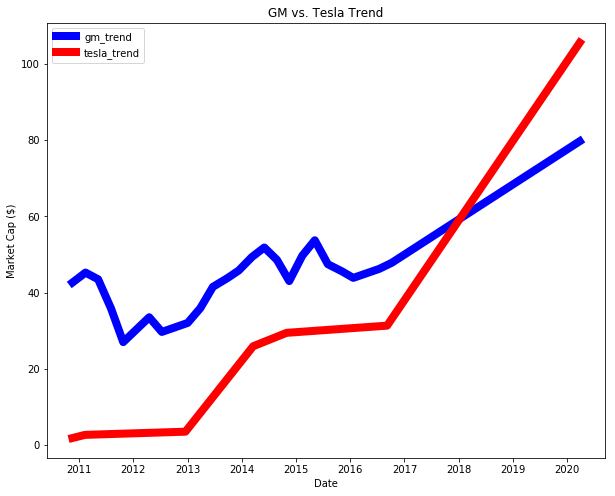

In [23]:
plt.figure(figsize=(10, 8))
plt.plot(forecast['Date'], forecast['gm_trend'], 'b-',linewidth=8)
plt.plot(forecast['Date'], forecast['tesla_trend'], 'r-',linewidth=8)
plt.legend(); plt.xlabel('Date'); plt.ylabel('Market Cap ($)')
plt.title('GM vs. Tesla Trend')

In [24]:
forecast.gm_yhat

0       45.147329
1       45.174258
2       45.466485
3       45.493988
4       45.653690
5       45.747275
6       45.947214
7       45.925861
8       46.029437
9       46.044649
10      45.994905
11      45.989596
12      45.904048
13      45.948764
14      45.912264
15      45.819611
16      45.751669
17      45.670318
18      45.732496
19      45.726641
20      45.677381
21      45.806586
22      45.808523
23      45.959723
24      46.046476
25      46.486006
26      46.563339
27      46.779713
28      46.919513
29      47.003434
          ...    
2549    79.419929
2550    79.367550
2551    79.257788
2552    79.098600
2553    79.041696
2554    79.122689
2555    79.010662
2556    79.036486
2557    78.987716
2558    78.888156
2559    78.745066
2560    78.709290
2561    78.815448
2562    78.731536
2563    78.787280
2564    78.769075
2565    78.699585
2566    78.584990
2567    78.575151
2568    78.703824
2569    78.638299
2570    78.707768
2571    78.698277
2572    78.632346
2573    78

Text(0.5, 1.0, 'GM vs. Tesla Trend')

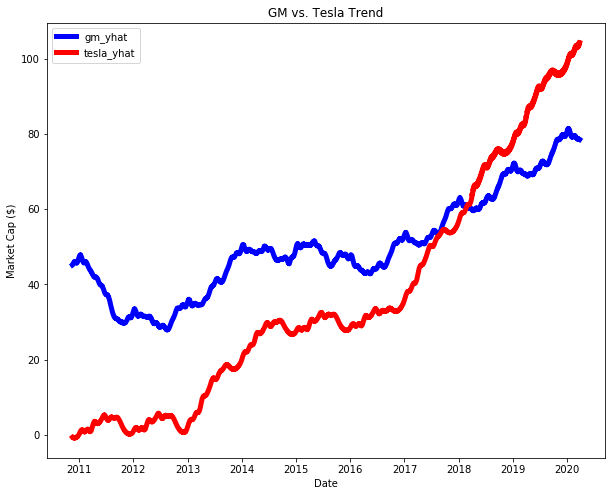

In [25]:
plt.figure(figsize=(10, 8))
plt.plot(forecast['Date'], forecast['gm_yhat'], 'b-',linewidth=5)
plt.plot(forecast['Date'], forecast['tesla_yhat'], 'r-',linewidth=5)
plt.legend(); plt.xlabel('Date'); plt.ylabel('Market Cap ($)')
plt.title('GM vs. Tesla Trend')

Text(0.5, 1.0, 'Market Cap Prediction for GM and Tesla')

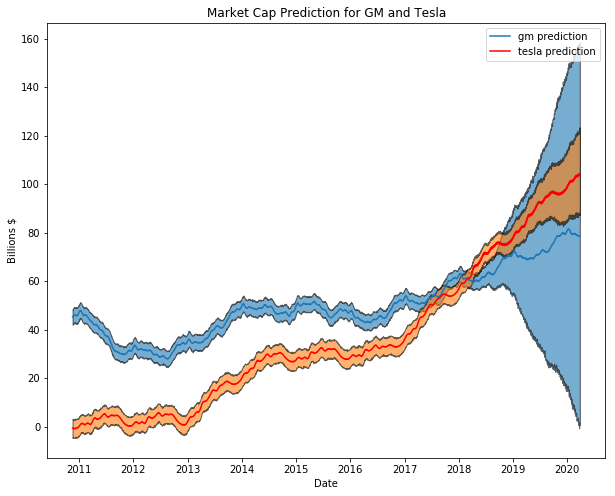

In [26]:
# Create subplots to set figure size
fig, ax = plt.subplots(1, 1, figsize=(10, 8));

# Plot estimate
ax.plot(forecast['Date'], forecast['gm_yhat'], label = 'gm prediction');

# Plot uncertainty values
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['gm_yhat_upper'], 
                forecast['gm_yhat_lower'], alpha=0.6, edgecolor = 'k');

# Plot estimate and uncertainty for tesla
ax.plot(forecast['Date'], forecast['tesla_yhat'], 'r', label = 'tesla prediction');
ax.fill_between(forecast['Date'].dt.to_pydatetime(), forecast['tesla_yhat_upper'], 
                forecast['tesla_yhat_lower'], alpha=0.6, edgecolor = 'k');
plt.legend();
plt.xlabel('Date'); plt.ylabel('Billions $'); plt.title('Market Cap Prediction for GM and Tesla')

## Other plots

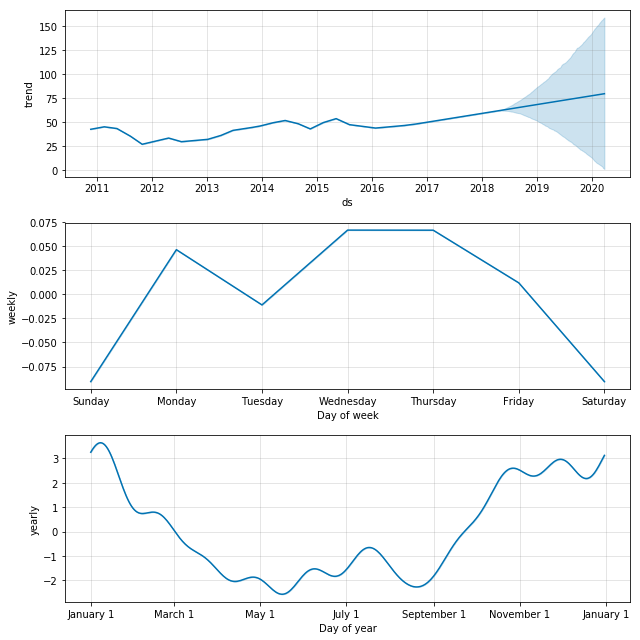

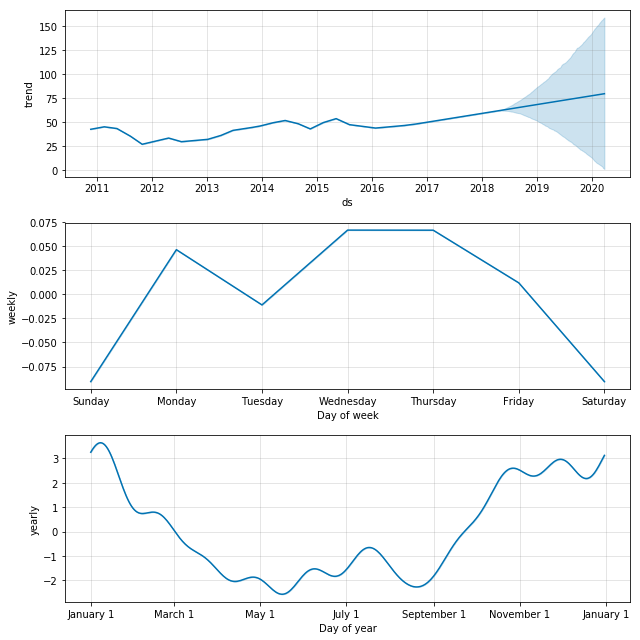

In [27]:
gm_prophet.plot_components(gm_forecast)

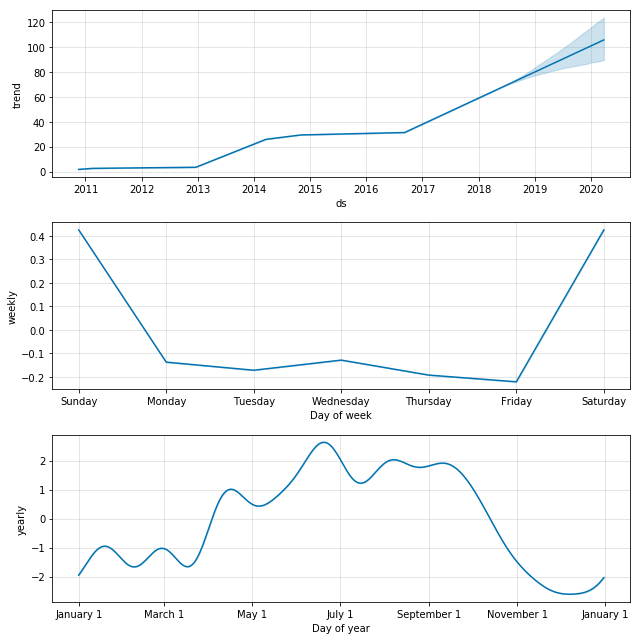

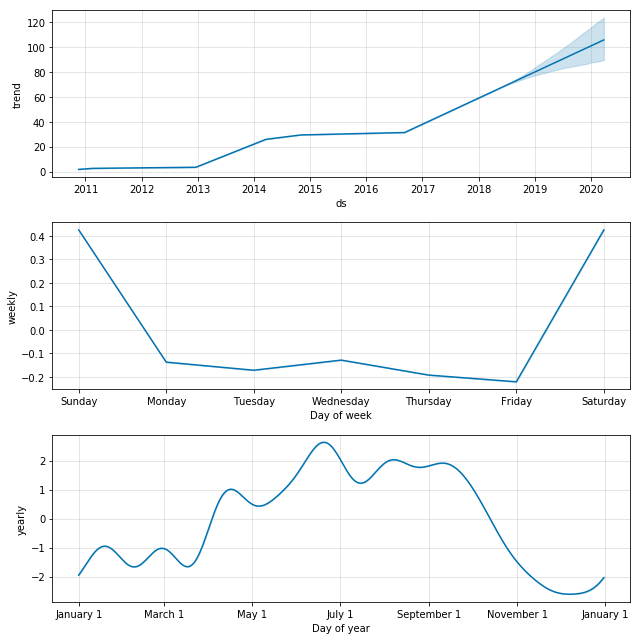

In [28]:
tesla_prophet.plot_components(tesla_forecast)